# Chapter 5 Examples - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", 
#                    "AICcmodavg", "ellipse", "asbio", "QuantPsyc", 
#                    "qpcR","qqplotr"))

## Load Libraries

In [2]:
suppressMessages(library(readxl))
suppressMessages(library(qpcR))
suppressMessages(library(ggplot2))
suppressMessages(library(qqplotr))

### Define Functions

In [49]:
create_residuals_df <- function(linearMod){
    #Calculate Residuals
    Residuals <- resid(linearMod)
    StandardizedResiduals <- resid(linearMod) / sqrt(tail(anova(Delivery.lm)[['Mean Sq']], n=1))
    HatMatrixDiagonals <- unname(influence(linearMod)$hat)
    StudentizedResiduals <- rstandard(linearMod)
    PRESSResiduals <- PRESS(linearMod, verbose = FALSE)$residuals
    RStudentResiduals <- rstudent(linearMod)
    PRESSResidualsSqrd <- PRESSResiduals^2
    
    #Add Residuals to df
    df <- data.frame(
        unname(Residuals),
        unname(StandardizedResiduals),
        unname(StudentizedResiduals),
        HatMatrixDiagonals,
        PRESSResiduals,
        RStudentResiduals,
        PRESSResidualsSqrd
    )
    
    #Rename Columns
    colnames(df) <- c(
        "Residuals",
        "StandardizedResiduals",
        "StudentizedResiduals", 
        "HatMatrixDiagonals", 
        "PRESSResiduals", 
        "RStudentResiduals", 
        "PRESSResidualsSqrd"
    )
    
    return(df)
    
}

### 5.1 The Electric Utility Data

In [50]:
Electric.table <- read_excel(
    '../linear_regression_5e_data_sets/Chapter 5/Examples/data-ex-5-1 (Electric Utility).xls')

Electric.df <- data.frame(Electric.table$`x (kWh)`,
                         Electric.table$`y (kW)`)

colnames(Electric.df) <- c("x", "y")

head(Electric.df)

,x,y
,<dbl>,<dbl>
1,679,0.79
2,292,0.44
3,1012,0.56
4,493,0.79
5,582,2.70
6,1156,3.64


In [51]:
Electric.lm <- lm(
    y ~ x,
    data=Electric.df)

print(Electric.lm)


Call:
lm(formula = y ~ x, data = Electric.df)

Coefficients:
(Intercept)            x  
  -0.831304     0.003683  



In [52]:
summary(Electric.lm)


Call:
lm(formula = y ~ x, data = Electric.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1399 -0.8275 -0.1934  1.2376  3.1522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.8313037  0.4416121  -1.882   0.0655 .  
x            0.0036828  0.0003339  11.030 4.11e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.577 on 51 degrees of freedom
Multiple R-squared:  0.7046,	Adjusted R-squared:  0.6988 
F-statistic: 121.7 on 1 and 51 DF,  p-value: 4.106e-15


In [53]:
anova(Electric.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,302.6331,302.633136,121.6582,4.106229e-15
Residuals,51,126.8660,2.487569,NA,NA


In [55]:
Electric.Residuals <- create_residuals_df(Electric.lm)

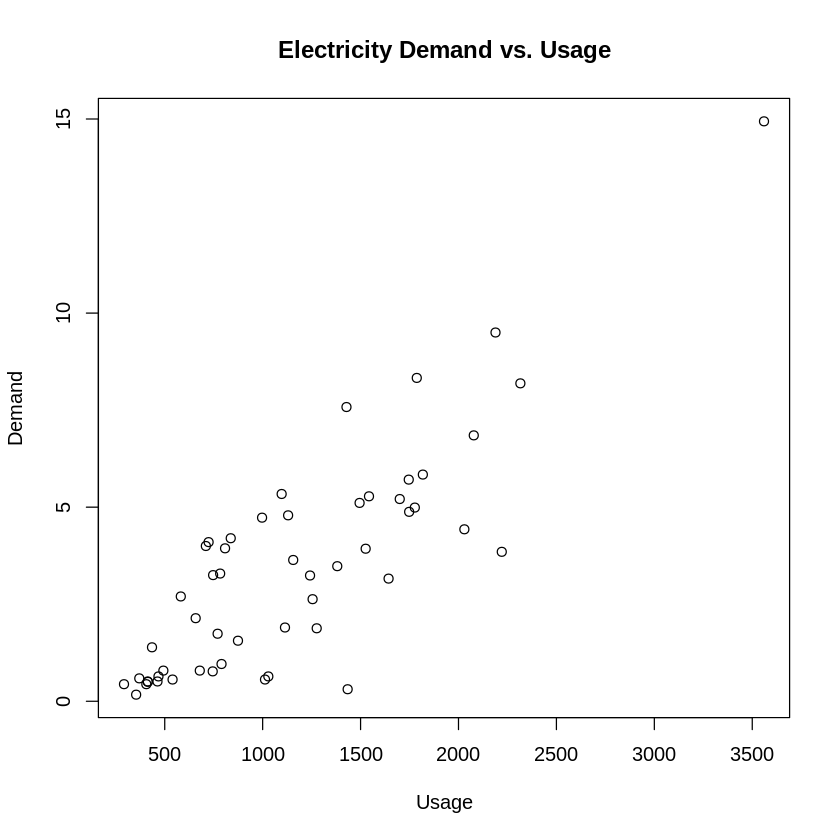

In [59]:
plot(
    Electric.df$x, 
    Electric.df$y,
    xlab="Usage",
    ylab="Demand",
    main="Electricity Demand vs. Usage"
)

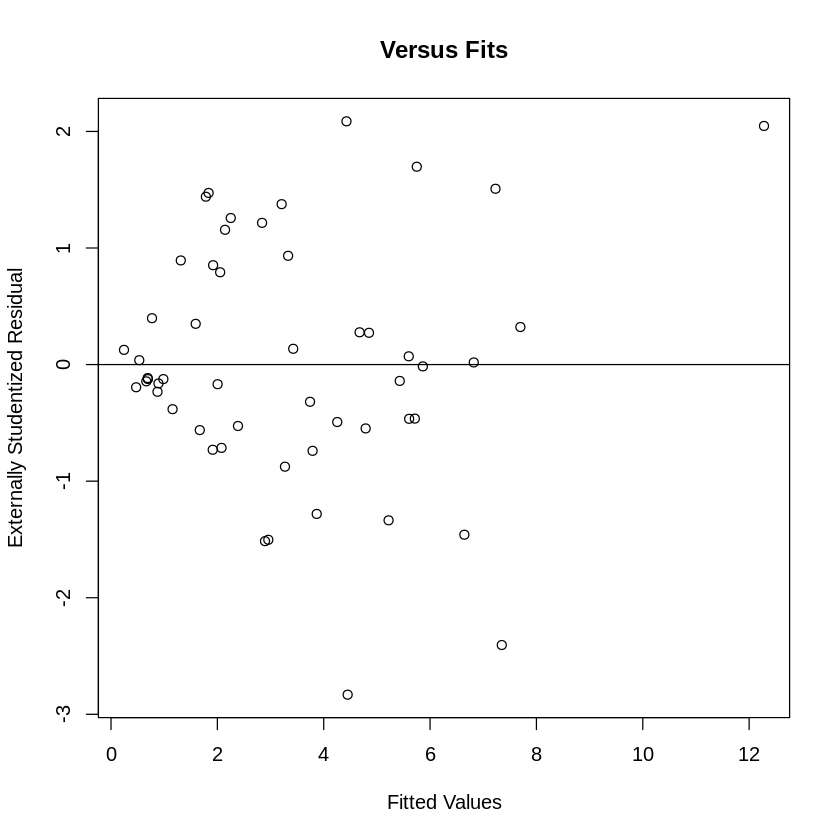

In [60]:
plot(
    fitted(Electric.lm), 
    Electric.Residuals$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

In [62]:
Electric.df$y_transformed <- sqrt(Electric.df$y)

In [64]:
Electric.lm_2 <- lm(
    y_transformed ~ x,
    data=Electric.df)

In [65]:
Electric.Residuals_2 <- create_residuals_df(Electric.lm_2)

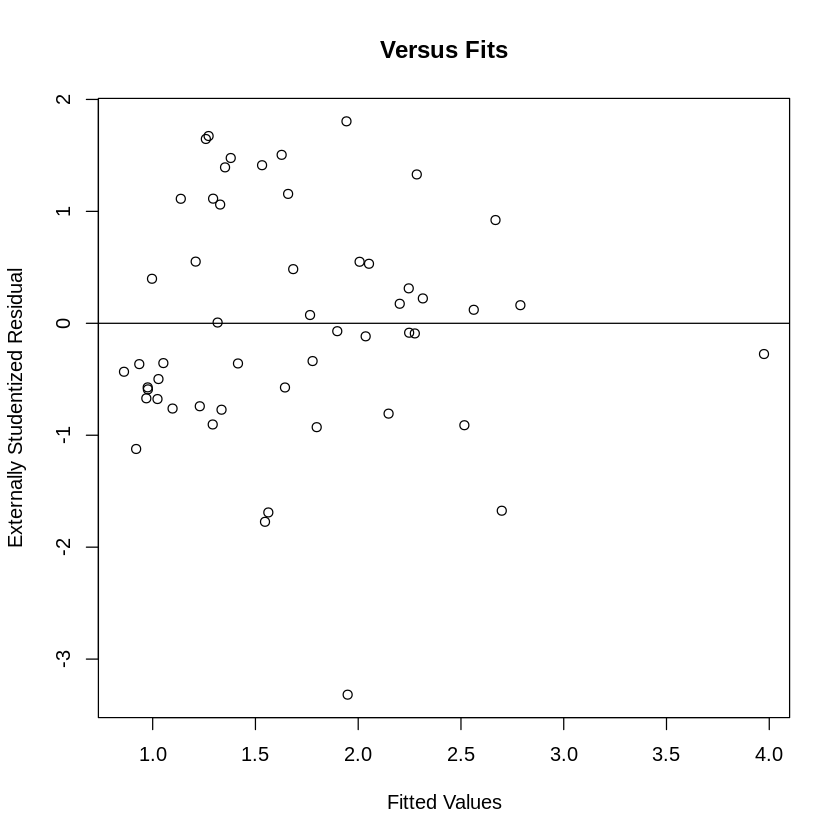

In [67]:
plot(
    fitted(Electric.lm_2), 
    Electric.Residuals_2$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

## 5.2 The Windmill Data

In [69]:
Windmill.table <- read_excel(
    '../linear_regression_5e_data_sets/Chapter 5/Examples/data-ex-5-2 (Windmill).xls')

Windmill.df <- data.frame(Windmill.table$`Wind Velocity, xi (mph)`,
                         Windmill.table$`DC Output, yi`)

colnames(Windmill.df) <- c("x", "y")

head(Windmill.df)

,x,y
,<dbl>,<dbl>
1,5.0,1.582
2,6.0,1.822
3,3.4,1.057
4,2.7,0.500
5,10.0,2.236
6,9.7,2.386


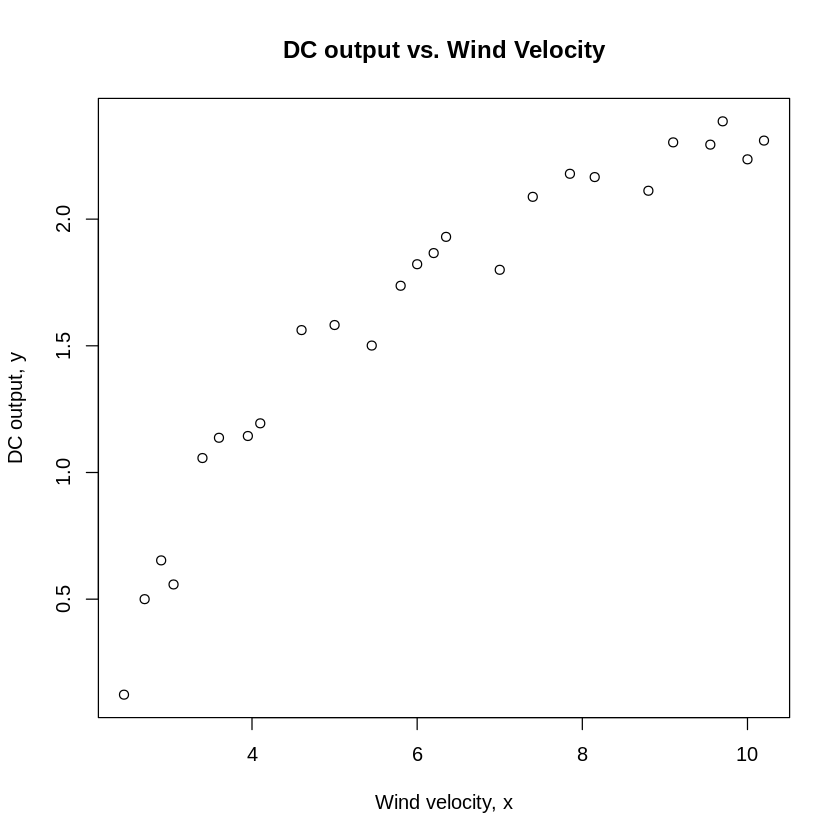

In [71]:
plot(
    Windmill.df$x, 
    Windmill.df$y,
    xlab="Wind velocity, x",
    ylab="DC output, y",
    main="DC output vs. Wind Velocity"
)

In [72]:
Windmill.lm <- lm(
    y ~ x,
    data=Windmill.df)

In [74]:
Windmill.Residuals <- create_residuals_df(Windmill.lm)

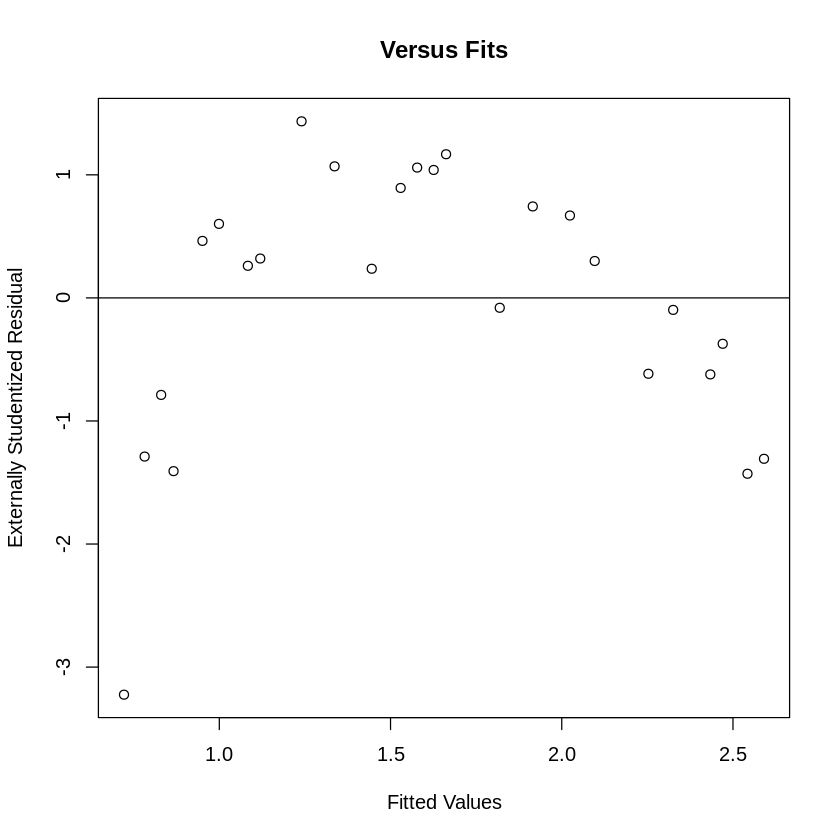

In [76]:
plot(
    fitted(Windmill.lm), 
    Windmill.Residuals$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

In [77]:
Windmill.df$x_transformed <- 1/Windmill.df$x

In [78]:
Windmill.lm_2 <- lm(y ~ x_transformed, data=Windmill.df)

In [79]:
Windmill.Residuals_2 <- create_residuals_df(Windmill.lm_2)

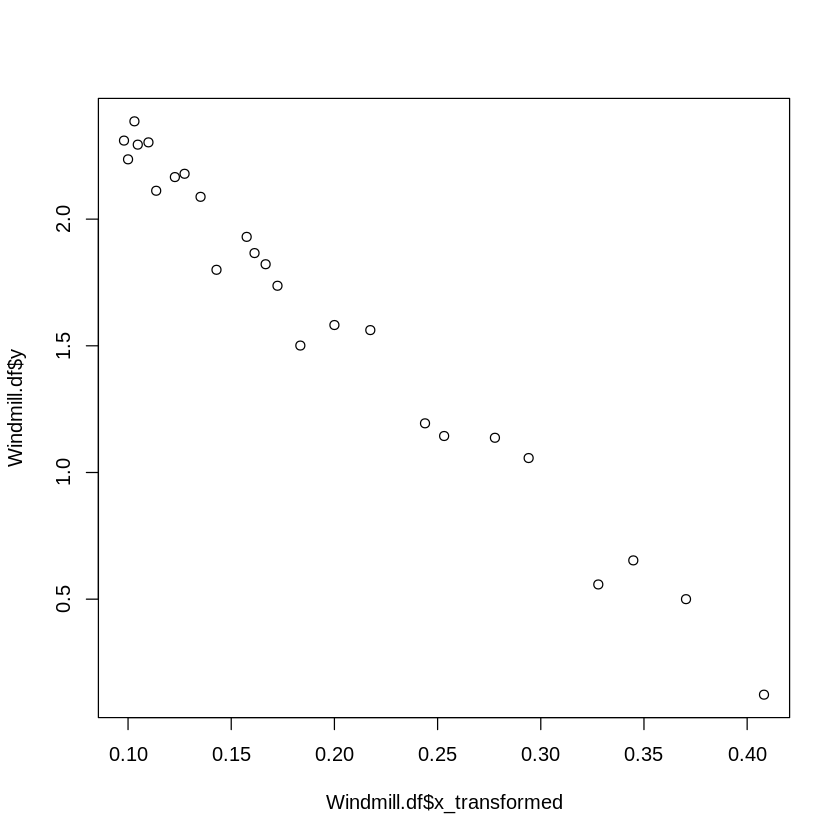

In [81]:
plot(Windmill.df$x_transformed, Windmill.df$y)

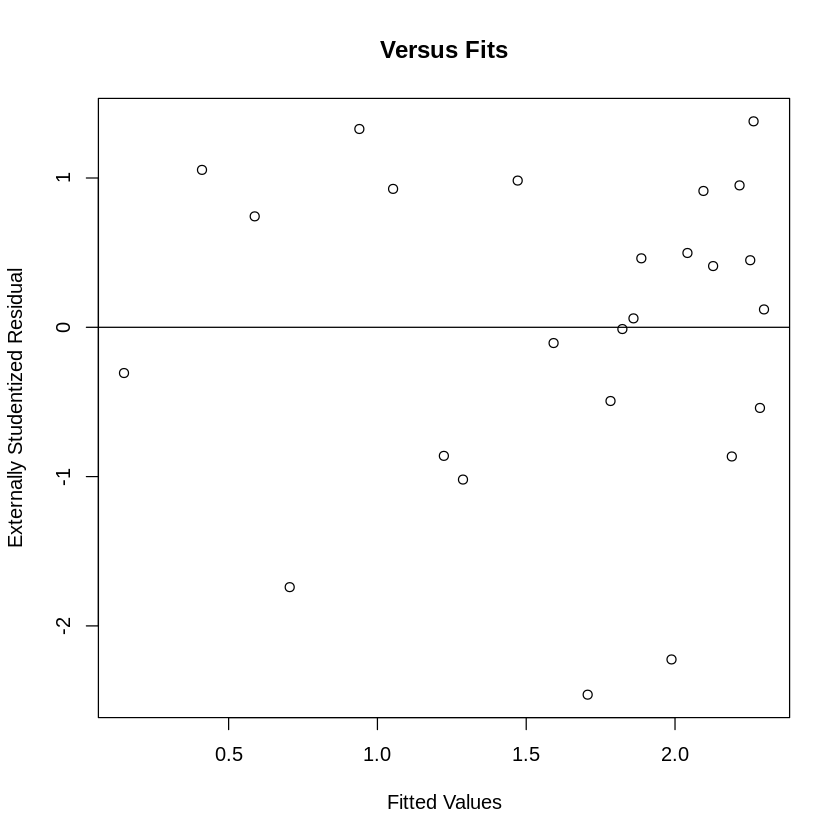

In [82]:
plot(
    fitted(Windmill.lm_2), 
    Windmill.Residuals_2$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

### 5.3 Electric Utility Data

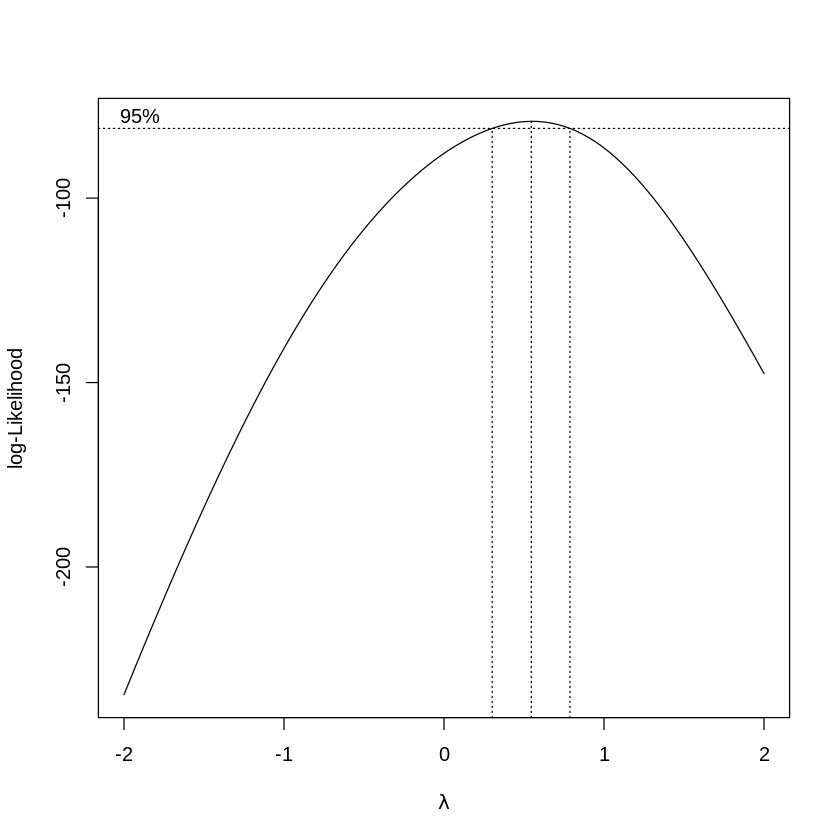

In [90]:
boxcox(Electric.lm)

### 5.4 Box Tidwell ??

### 5.5 Weighted Least Squares

### 5.6

### 5.7 Delivery Time Data Revisited

In [109]:
Delivery.table <- read_excel(
    '../linear_regression_5e_data_sets/Chapter 3/Examples/data-ex-3-1 (Delivery Time).xls')

Delivery.df <- data.frame(Delivery.table$`Delivery Time, y`, 
                              Delivery.table$`Number of Cases, x1`, 
                              Delivery.table$`Distance, x2 (ft)`)

colnames(Delivery.df) <- c("DeliveryTime", "NumberCases", "Distance")

head(Delivery.df)

,DeliveryTime,NumberCases,Distance
,<dbl>,<dbl>,<dbl>
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330


In [112]:
install.packages("nlme")
library(nlme)

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [120]:
city <- c(
        "SD","SD","SD","SD","SD","SD","SD",
        "B","B","B","B","B","B","B","B","B","B",
        "A","A","A","A","A","A",
        "M","M")

In [122]:
Delivery.df$city <- city

In [123]:
Delivery.df

DeliveryTime,NumberCases,Distance,city
<dbl>,<dbl>,<dbl>,<chr>
16.68,7,560,SD
11.50,3,220,SD
12.03,3,340,SD
14.88,4,80,SD
13.75,6,150,SD
18.11,7,330,SD
8.00,2,110,SD
17.83,7,210,B
79.24,30,1460,B


In [124]:
Delivery.model <- lme(DeliveryTime~NumberCases+Distance, random=~1|city, data=Delivery.df)

In [125]:
print(Delivery.model)

Linear mixed-effects model fit by REML
  Data: Delivery.df 
  Log-restricted-likelihood: -68.34199
  Fixed: DeliveryTime ~ NumberCases + Distance 
(Intercept) NumberCases    Distance 
 2.07543193  1.71482344  0.01203165 

Random effects:
 Formula: ~1 | city
        (Intercept) Residual
StdDev:    1.609268 2.964796

Number of Observations: 25
Number of Groups: 4 
